In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_games = pd.read_csv("../dados/game-sales-kaggle/game_sales.csv", sep=',')

In [276]:
df_games["Year"] = df_games["Year"].fillna(df_games["Year"].mean())
df_games["Year"] = df_games["Year"].astype(int)

In [277]:
lbl_encoder = LabelEncoder()

for col in ("Platform", "Genre", "Publisher"):
    df_games[f"{col}_encoded"] = lbl_encoder.fit_transform(df_games[col])

In [278]:
scaler = StandardScaler()

df = df_games.iloc[:, -7:]

df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6
0,50.480508,57.136930,11.938058,44.606085,1.215677,1.348221,0.361616
1,35.284437,6.794188,21.767296,3.828224,-0.571730,-0.246717,0.361616
2,19.084273,25.197785,12.002724,17.297115,1.215677,0.284929,0.361616
3,18.961823,21.497277,10.353740,15.441165,1.215677,1.348221,0.361616
4,13.476053,17.302048,32.792857,5.047848,-1.286693,0.550752,0.361616
...,...,...,...,...,...,...,...
16593,-0.311841,-0.290207,-0.251492,-0.254864,-1.167533,-0.246717,-0.143768
16594,-0.311841,-0.290207,-0.251492,-0.254864,-1.048372,0.816575,-0.300999
16595,-0.324086,-0.290207,-0.251492,-0.254864,0.024072,0.284929,-1.536382
16596,-0.324086,-0.270418,-0.251492,-0.254864,-1.405854,0.019106,-1.609382


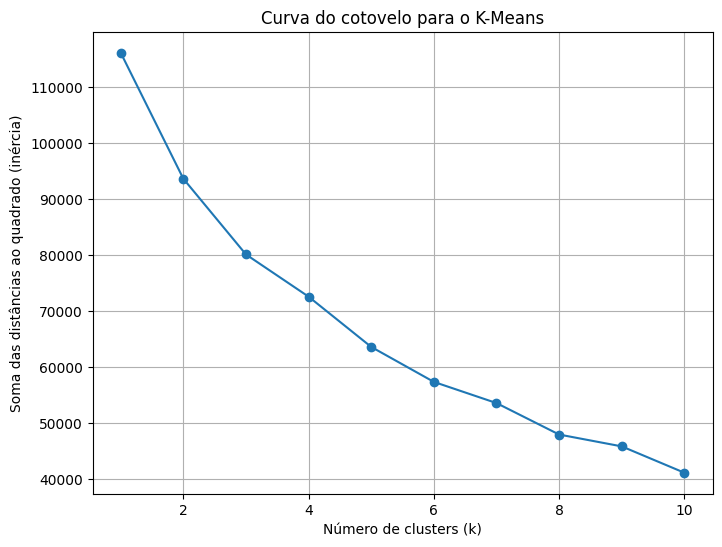

In [279]:
inertia = []
k_values = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    k_values.append(i)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Curva do cotovelo para o K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Soma das distâncias ao quadrado (inércia)')
plt.grid(True)
plt.show()

In [280]:
dbscan = DBSCAN(eps=1, min_samples=8)
df["Rotulo"] = dbscan.fit_predict(df)
df_games["Rotulo"] = df["Rotulo"]

df_games["Rotulo"].value_counts()

Rotulo
 0    16025
-1      573
Name: count, dtype: int64

In [281]:
rotulo_maior_ocorrencia = df_games["Rotulo"].value_counts().index[0]
df_games["Global_Sales"] = df_games.loc[:, "NA_Sales":"Other_Sales"].sum(axis=1)

media_rotulo_maior_oc = df_games[df_games["Rotulo"] == rotulo_maior_ocorrencia]["Global_Sales"].mean()
std_rotulo_maior_oc = df_games[df_games["Rotulo"] == rotulo_maior_ocorrencia]["Global_Sales"].std()

media_anomalia = df_games[df_games["Rotulo"] == -1]["Global_Sales"].mean()
std_anomalia = df_games[df_games["Rotulo"] == -1]["Global_Sales"].std()

print(f"Rótulo {rotulo_maior_ocorrencia}: Média: {media_rotulo_maior_oc:.2f}, Std: {std_rotulo_maior_oc:.2f}\n\
Rótulo -1: Média: {media_anomalia:.2f}, Std: {std_anomalia:.2f}")

Rótulo 0: Média: 0.35, Std: 0.50
Rótulo -1: Média: 5.64, Std: 6.01
